In [1]:
import os
os.chdir("..")


import numpy as np
import hydra
import numpy as np
import pandas as pd
from tsfeatures import tsfeatures
from statsmodels.tsa.stattools import acf

In [2]:
# load the gate_values_epoch_0.npy file
gate_values = np.load("gate_values_stack0_epoch_0_36.npy")
all_inputs = np.load("all_inputs_stack0_epoch_0_36.npy")

print("Gate values shape:", gate_values.shape)
print("All inputs shape:", all_inputs.shape)
gate_values

Gate values shape: (1428, 3)
All inputs shape: (1428, 54)


array([[0.34906638, 0.1680694 , 0.4828643 ],
       [0.34367755, 0.32717848, 0.3291439 ],
       [0.19625528, 0.35218424, 0.45156047],
       ...,
       [0.4187521 , 0.23366506, 0.34758285],
       [0.27499956, 0.3657846 , 0.3592159 ],
       [0.28725082, 0.30052662, 0.41222256]], dtype=float32)

In [3]:
# Convert to DataFrame format for tsfeatures
time_series_list = []


for timestep in range(all_inputs.shape[0]):
    df_temp = pd.DataFrame({
        "unique_id": [f"Unique_id_{timestep}"] * all_inputs.shape[1],
        "ds": pd.date_range(start="2000-01-01", periods=all_inputs.shape[1], freq="M"),  # Adjusted periods
        "y": all_inputs[timestep, :]
    })
    time_series_list.append(df_temp)

# Combine all series into one DataFrame
df_ts = pd.concat(time_series_list, ignore_index=True)

# Extract features
features = tsfeatures(df_ts, freq=12) 
print(features.head())  # Check extracted features

        unique_id     hurst  series_length  unitroot_pp  unitroot_kpss  \
0     Unique_id_0       NaN             54   -53.565969       0.368563   
1     Unique_id_1       NaN             54   -21.370068       0.336113   
2    Unique_id_10  1.000368             54    -4.239301       0.266623   
3   Unique_id_100  0.942301             54     3.483782       1.100443   
4  Unique_id_1000  0.767150             54   -15.924430       1.198832   

   hw_alpha       hw_beta      hw_gamma  stability  nperiods  ...   entropy  \
0  0.213543  2.590893e-13  4.273750e-12   0.309514         1  ...  0.851184   
1  0.745422  4.383231e-13  4.712357e-14   0.246198         1  ...  0.804455   
2  1.000000  2.922410e-01  1.654412e-12   1.187837         1  ...  0.353572   
3  1.000000  6.631115e-01  1.489475e-08   0.499937         1  ...  0.396871   
4  0.119487  1.194872e-01  4.720719e-14   0.439813         1  ...  0.702123   

   crossing_points   arch_lm    x_acf1   x_acf10  diff1_acf1  diff1_acf10  \
0  

In [4]:
features.shape

(1428, 43)

In [5]:
# add gate values to the features

gate_values_df = pd.DataFrame(gate_values)

features_with_gates = pd.concat([features, gate_values_df], axis=1)
features_with_gates

,unique_id,hurst,series_length,unitroot_pp,unitroot_kpss,hw_alpha,hw_beta,hw_gamma,stability,nperiods,...,x_acf1,x_acf10,diff1_acf1,diff1_acf10,diff2_acf1,diff2_acf10,seas_acf1,0,1,2
0,Unique_id_0,NaN,54,-53.565969,0.368563,2.135433e-01,2.590893e-13,4.273750e-12,0.309514,1,...,0.058309,0.210927,-0.588231,0.460202,-0.701944,0.631542,-0.039558,0.349066,0.168069,0.482864
1,Unique_id_1,NaN,54,-21.370068,0.336113,7.454221e-01,4.383231e-13,4.712357e-14,0.246198,1,...,0.501255,0.356890,-0.180296,0.111996,-0.501390,0.287283,0.085780,0.343678,0.327178,0.329144
2,Unique_id_10,1.000368,54,-4.239301,0.266623,1.000000e+00,2.922410e-01,1.654412e-12,1.187837,1,...,0.945212,3.355899,0.283880,0.282432,-0.433976,0.233483,-0.215348,0.196255,0.352184,0.451560
3,Unique_id_100,0.942301,54,3.483782,1.100443,1.000000e+00,6.631115e-01,1.489475e-08,0.499937,1,...,0.931232,4.319673,0.868103,4.035163,-0.292291,0.363918,0.215841,0.303419,0.299936,0.396646
4,Unique_id_1000,0.767150,54,-15.924430,1.198832,1.194872e-01,1.194872e-01,4.720719e-14,0.439813,1,...,0.591311,1.159164,-0.111237,0.364138,-0.379597,0.312927,0.508382,0.340125,0.289237,0.370638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423,Unique_id_995,0.971957,54,-12.612423,1.148121,3.415970e-01,1.784083e-14,6.469932e-14,0.684733,1,...,0.680874,2.173319,-0.449042,0.327121,-0.652311,0.598068,0.273882,0.273113,0.349584,0.377302
1424,Unique_id_996,NaN,54,-24.997756,0.167390,5.687409e-01,0.000000e+00,0.000000e+00,0.136232,1,...,0.462431,0.359175,-0.334416,0.275999,-0.577823,0.576547,-0.289766,0.321607,0.293117,0.385275
1425,Unique_id_997,0.839469,54,-19.690304,0.613788,5.598396e-01,5.040933e-14,5.694936e-14,0.695135,1,...,0.619606,1.000355,-0.353230,0.298698,-0.604633,0.591666,-0.129810,0.418752,0.233665,0.347583
1426,Unique_id_998,0.652311,54,-16.768260,0.491514,1.490116e-08,7.801055e-09,6.214585e-16,0.214976,1,...,0.724241,1.177153,0.223809,0.372352,-0.368740,0.318713,0.668138,0.275000,0.365785,0.359216


compute correlation ...

In [6]:
temp = features_with_gates.copy()
temp = temp.drop(columns=["unique_id"])
correlation_matrix = temp.corr(method='spearman')
correlation_matrix

,hurst,series_length,unitroot_pp,unitroot_kpss,hw_alpha,hw_beta,hw_gamma,stability,nperiods,seasonal_period,...,x_acf1,x_acf10,diff1_acf1,diff1_acf10,diff2_acf1,diff2_acf10,seas_acf1,0,1,2
hurst,1.000000,NaN,0.753751,0.740014,0.578744,0.020662,-0.066505,0.891085,NaN,NaN,...,0.734906,0.766563,0.271055,-0.114704,0.147807,-0.133537,-0.161925,-0.065810,0.059340,0.039361
series_length,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
unitroot_pp,0.753751,NaN,1.000000,0.612298,0.707734,-0.046497,-0.129010,0.759357,NaN,NaN,...,0.963248,0.883516,0.607018,-0.149549,0.405052,-0.294357,0.066777,-0.082410,0.074239,0.045383
unitroot_kpss,0.740014,NaN,0.612298,1.000000,0.333452,-0.051529,-0.089689,0.788041,NaN,NaN,...,0.566393,0.644078,0.140405,-0.038445,0.144051,-0.090523,0.247384,-0.060075,0.039228,0.047654
hw_alpha,0.578744,NaN,0.707734,0.333452,1.000000,-0.206937,0.044114,0.579161,NaN,NaN,...,0.717182,0.586424,0.586926,-0.182600,0.412824,-0.314492,-0.154955,-0.072586,0.067435,0.039611
hw_beta,0.020662,NaN,-0.046497,-0.051529,-0.206937,1.000000,0.166498,-0.007428,NaN,NaN,...,-0.014973,0.000775,0.082831,0.189698,0.036292,-0.018947,-0.069334,-0.020942,0.059493,-0.048456
hw_gamma,-0.066505,NaN,-0.129010,-0.089689,0.044114,0.166498,1.000000,-0.074859,NaN,NaN,...,-0.100722,-0.119954,0.030427,-0.002188,0.092118,-0.122716,-0.165402,-0.045443,0.026469,0.061756
stability,0.891085,NaN,0.759357,0.788041,0.579161,-0.007428,-0.074859,1.000000,NaN,NaN,...,0.758883,0.763035,0.324260,-0.065994,0.215817,-0.146364,0.002195,-0.064884,0.062067,0.023849
nperiods,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seasonal_period,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# correlation_matrix = correlation_matrix.dropna(axis=0, how='all').dropna(axis=1, how='all')

Time to check the correlations ...

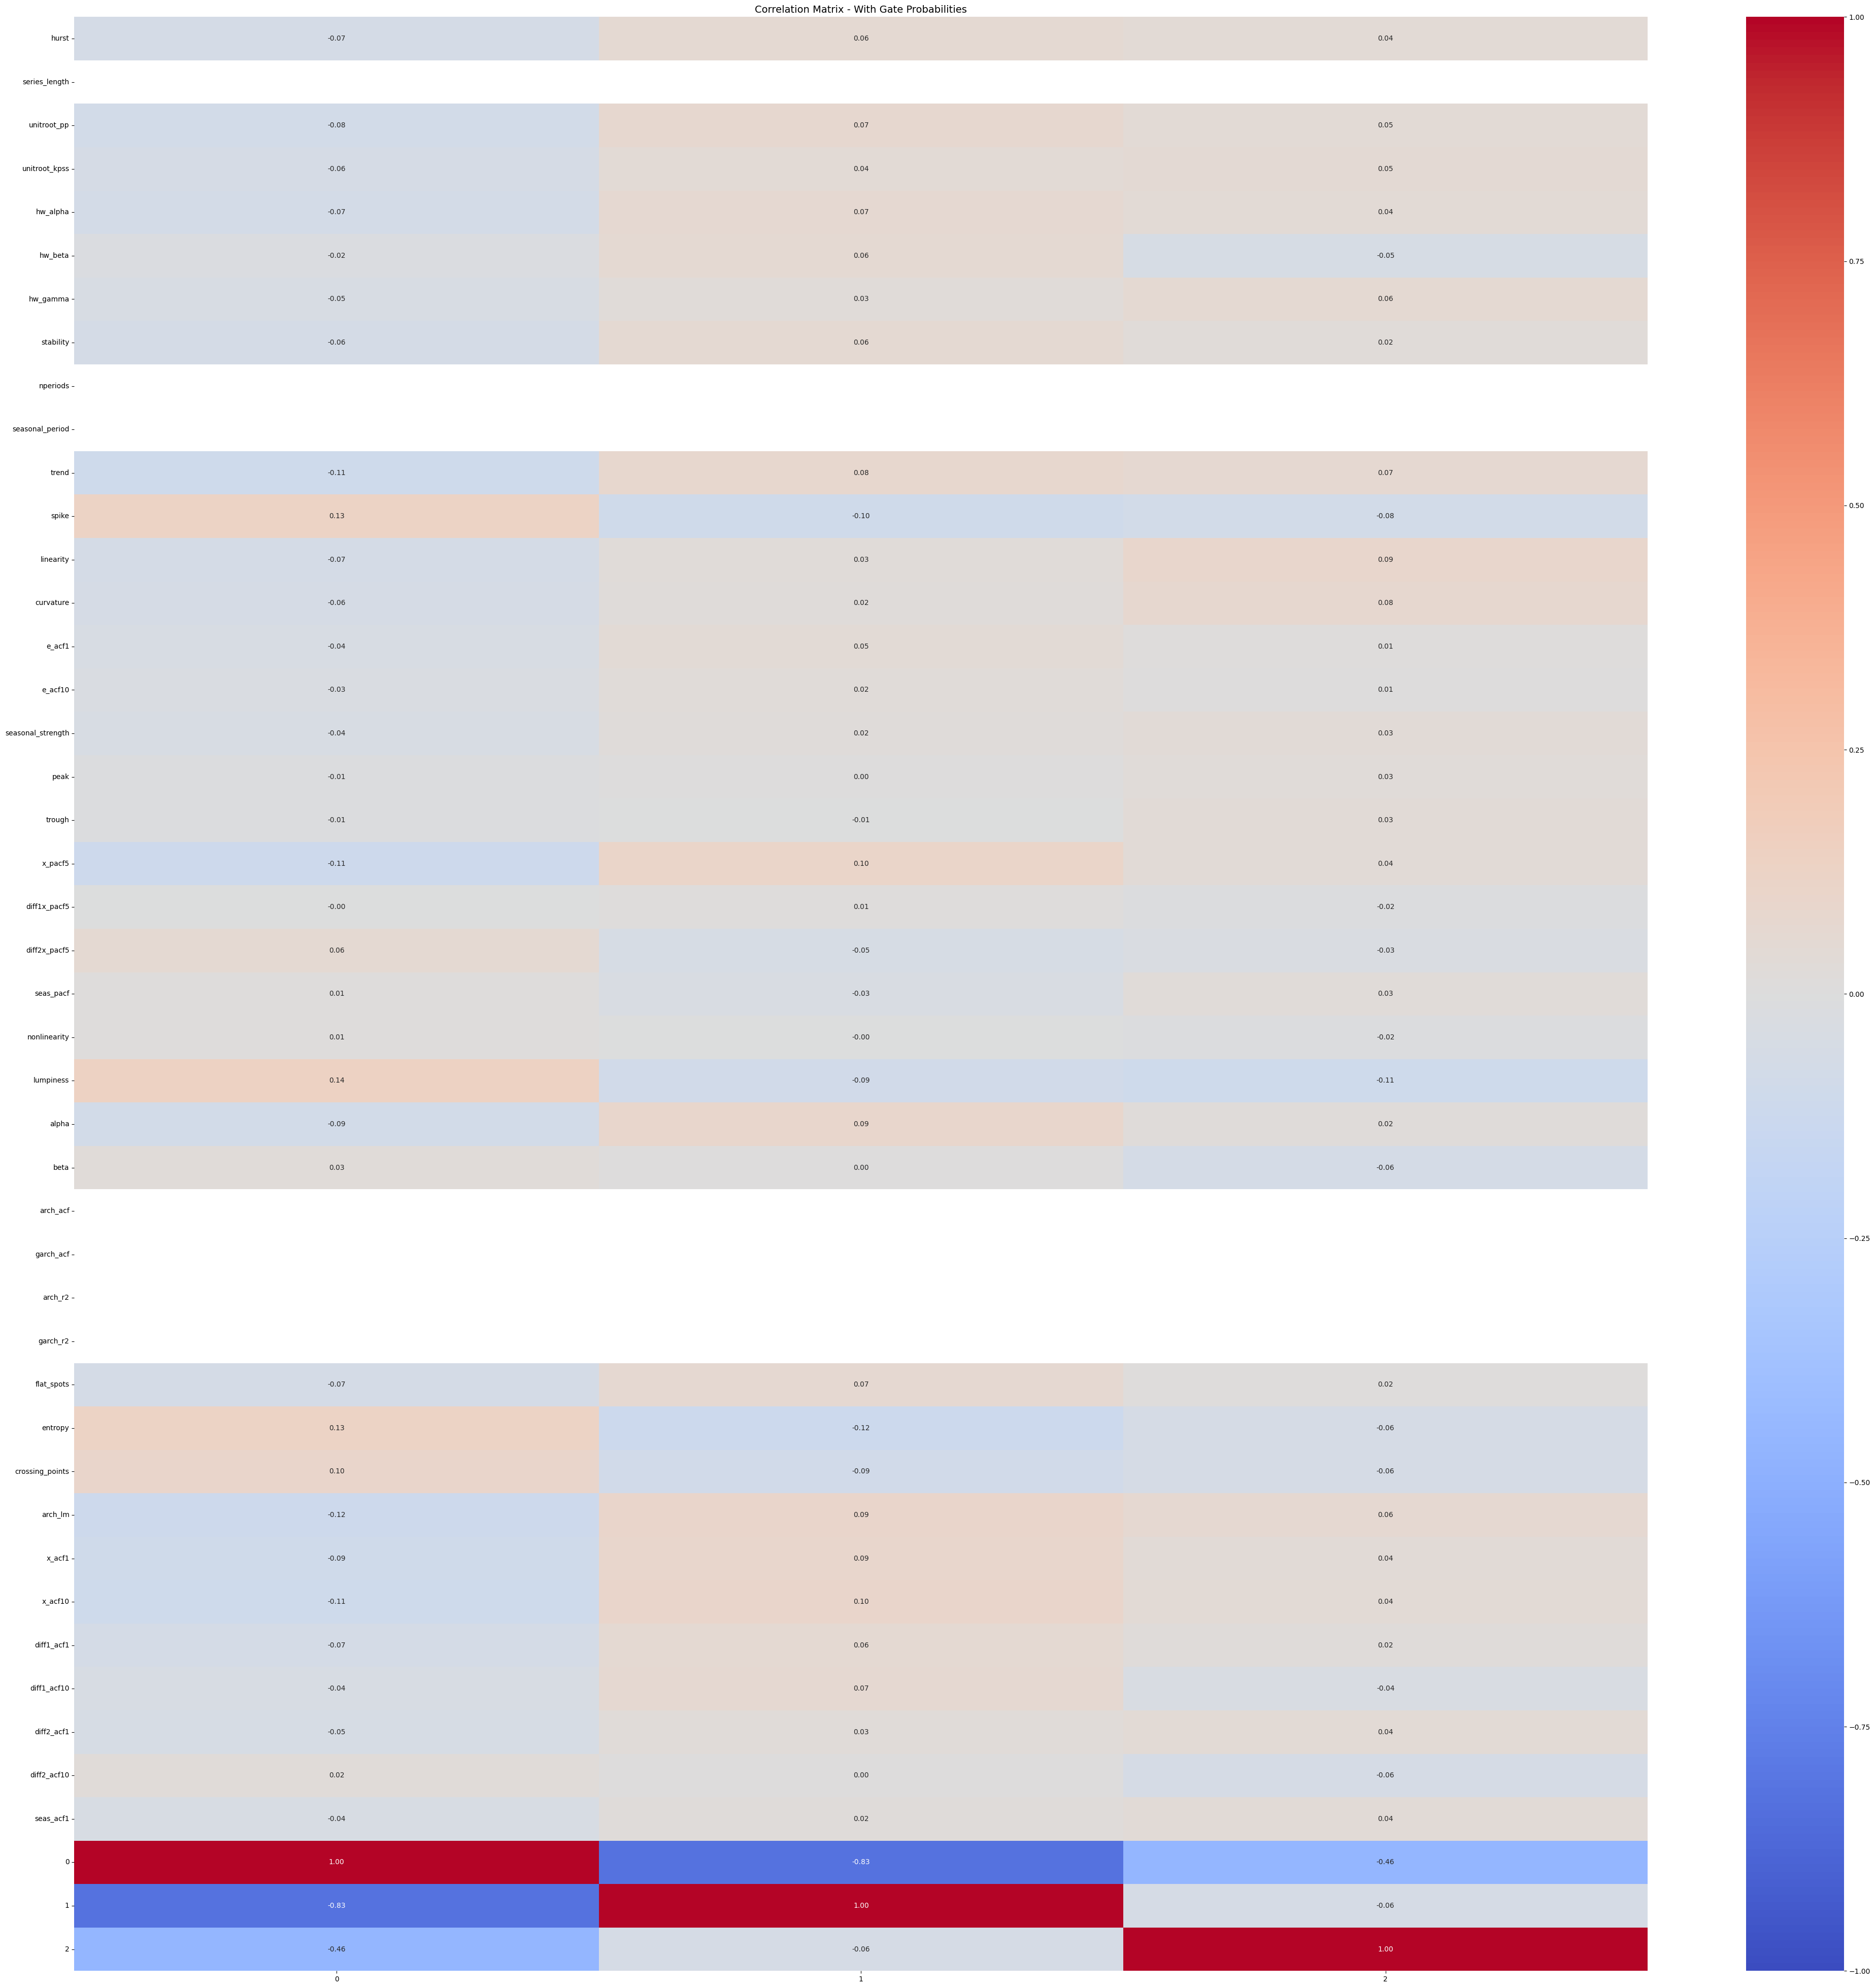

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


def plot_correlation_matrix(correlation_matrix, title="Correlation Between TS Features and Gate Probabilities"):
    # Set figure size
    plt.figure(figsize=(50, 50))

    # Create heatmap
    sns.heatmap(
        correlation_matrix, 
        annot=True,  # Show correlation values
        fmt=".2f",  # Limit decimal places
        cmap="coolwarm",  # Use diverging color map
        linewidths=0.0,  # Add gridlines
        vmin=-1, vmax=1  # Normalize color scale
    )

    # Title
    plt.title(title, fontsize=14)

    # Show plot
    plt.show()

correlation_matrix_only_gate = correlation_matrix[[col for col in correlation_matrix.columns if col in [0, 1, 2]]]
plot_correlation_matrix(correlation_matrix_only_gate, title="Correlation Matrix - With Gate Probabilities")

Columns with NaN values: ['hurst', 'arch_acf', 'garch_acf', 'arch_r2', 'garch_r2']


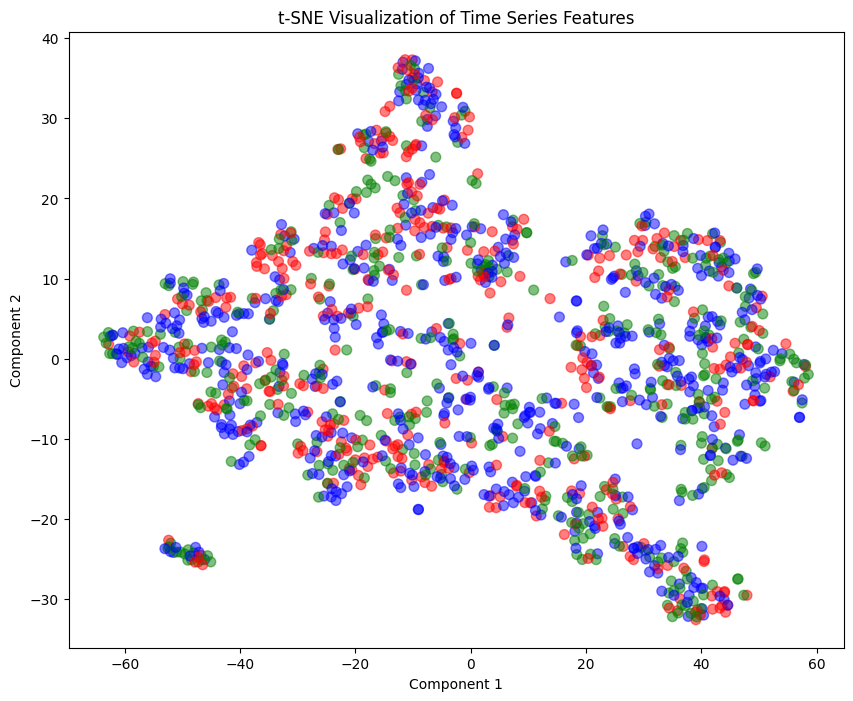

In [9]:
# t-SNE on the features
from sklearn.manifold import TSNE

features_without_gates = features.copy()
nan_columns = features_without_gates.columns[features_without_gates.isna().any()].tolist()
print("Columns with NaN values:", nan_columns)
features_without_gates = features_without_gates.drop(columns=["unique_id"] + nan_columns)

features_without_gates = features_without_gates.dropna(axis=0, how='all')
# Initialize t-SNE
tsne = TSNE(n_components=2, random_state=42)
# Fit and transform the data
tsne_results = tsne.fit_transform(features_without_gates) # features without gates

# Create a DataFrame for t-SNE results
tsne_df = pd.DataFrame(tsne_results, columns=['Component 1', 'Component 2'])

# Assign one color to each gate
colors = ['red', 'green', 'blue']

# Determine the gate with the biggest weight for each row
gate_values_max_indices = np.argmax(gate_values, axis=1)

# Map the gate indices to their corresponding colors
assigned_colors = [colors[idx] for idx in gate_values_max_indices]

# Plot t-SNE results with the color based on the gate with the biggest weight
plt.figure(figsize=(10, 8))
plt.scatter(tsne_df['Component 1'], tsne_df['Component 2'], c=assigned_colors, s=50, alpha=0.5)
plt.title('t-SNE Visualization of Time Series Features')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

In [10]:
features_without_gates.columns

Index(['series_length', 'unitroot_pp', 'unitroot_kpss', 'hw_alpha', 'hw_beta',
       'hw_gamma', 'stability', 'nperiods', 'seasonal_period', 'trend',
       'spike', 'linearity', 'curvature', 'e_acf1', 'e_acf10',
       'seasonal_strength', 'peak', 'trough', 'x_pacf5', 'diff1x_pacf5',
       'diff2x_pacf5', 'seas_pacf', 'nonlinearity', 'lumpiness', 'alpha',
       'beta', 'flat_spots', 'entropy', 'crossing_points', 'arch_lm', 'x_acf1',
       'x_acf10', 'diff1_acf1', 'diff1_acf10', 'diff2_acf1', 'diff2_acf10',
       'seas_acf1'],
      dtype='object')

In [11]:
# select only the trend and seasonality features
features_without_gates = features.copy()
features_without_gates = features_without_gates.drop(columns=["unique_id"] + nan_columns)
features_without_gates = features_without_gates.dropna(axis=0, how='all')

# Extract trend and seasonality features
trend_seasonality_features = features_without_gates[["trend", "linearity", "curvature", "seasonal_strength", "peak", "trough", "lumpiness", "spike"]]
trend_seasonality_features

,trend,linearity,curvature,seasonal_strength,peak,trough,lumpiness,spike
0,0.379819,1.246749,-3.039147,0.351577,11,12,0.088829,1.328082e-04
1,0.543702,2.311428,-2.440805,0.606859,6,11,0.123804,6.824195e-05
2,0.941820,0.813308,-4.453566,0.243053,9,5,0.004498,1.612547e-06
3,0.998816,6.032265,3.864640,0.589147,6,10,0.015581,7.406683e-10
4,0.908896,4.991444,0.671215,0.897725,10,12,0.023358,3.106943e-06
...,...,...,...,...,...,...,...,...
1423,0.851904,5.900746,0.628479,0.598854,7,3,0.119151,3.169690e-05
1424,0.503229,1.101019,-2.249789,0.364250,4,4,0.499447,7.827056e-05
1425,0.675374,-3.998012,1.710467,0.441978,12,12,0.083971,8.468292e-05
1426,0.923367,3.309082,0.158791,0.977453,5,12,0.035365,1.642510e-07


In [12]:
## add the gate values to the trend and seasonality features
trend_seasonality_features_with_gates = pd.concat([trend_seasonality_features, gate_values_df], axis=1)
trend_seasonality_features_with_gates

,trend,linearity,curvature,seasonal_strength,peak,trough,lumpiness,spike,0,1,2
0,0.379819,1.246749,-3.039147,0.351577,11,12,0.088829,1.328082e-04,0.349066,0.168069,0.482864
1,0.543702,2.311428,-2.440805,0.606859,6,11,0.123804,6.824195e-05,0.343678,0.327178,0.329144
2,0.941820,0.813308,-4.453566,0.243053,9,5,0.004498,1.612547e-06,0.196255,0.352184,0.451560
3,0.998816,6.032265,3.864640,0.589147,6,10,0.015581,7.406683e-10,0.303419,0.299936,0.396646
4,0.908896,4.991444,0.671215,0.897725,10,12,0.023358,3.106943e-06,0.340125,0.289237,0.370638
...,...,...,...,...,...,...,...,...,...,...,...
1423,0.851904,5.900746,0.628479,0.598854,7,3,0.119151,3.169690e-05,0.273113,0.349584,0.377302
1424,0.503229,1.101019,-2.249789,0.364250,4,4,0.499447,7.827056e-05,0.321607,0.293117,0.385275
1425,0.675374,-3.998012,1.710467,0.441978,12,12,0.083971,8.468292e-05,0.418752,0.233665,0.347583
1426,0.923367,3.309082,0.158791,0.977453,5,12,0.035365,1.642510e-07,0.275000,0.365785,0.359216


In [13]:
df = trend_seasonality_features_with_gates.copy()
df['trend_pct'] = df['trend'] / (df['trend'] + df['seasonal_strength'])

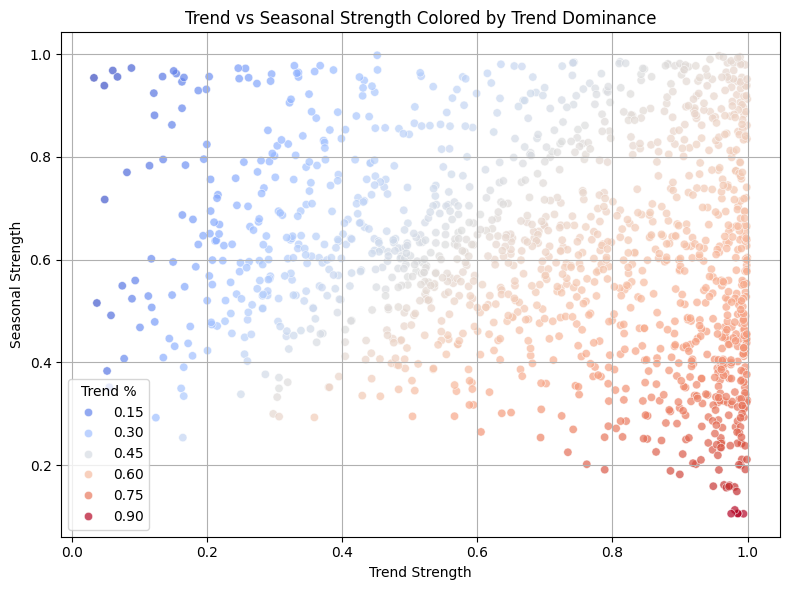

In [14]:
# plot in a graph the trend and seasonal_strength features, where x-axis is the trend and y-axis is the seasonal_strength
plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(
    data=df,
    x="trend",
    y="seasonal_strength",
    hue="trend_pct",
    palette="coolwarm",  # blue to red gradient
    edgecolor="w",
    alpha=0.7
)

plt.title("Trend vs Seasonal Strength Colored by Trend Dominance")
plt.xlabel("Trend Strength")
plt.ylabel("Seasonal Strength")
plt.legend(title="Trend %")
plt.grid(True)
plt.tight_layout()
plt.show()


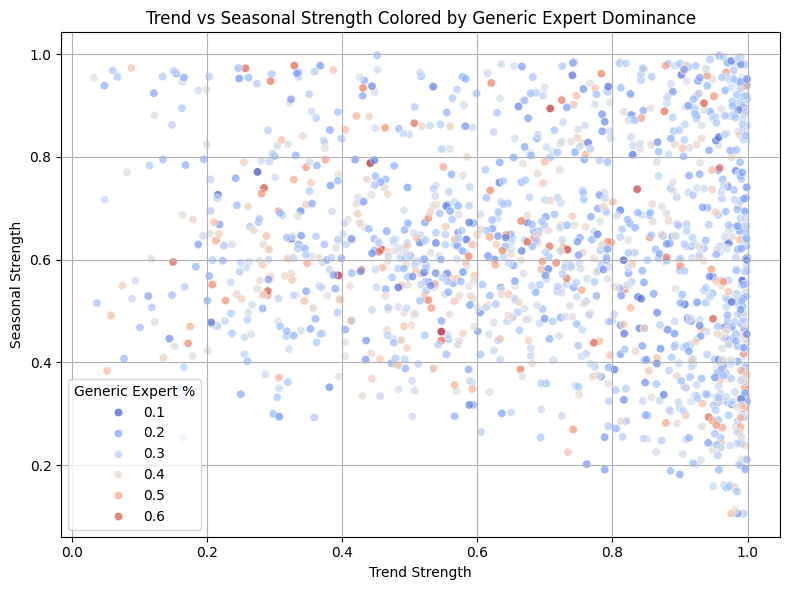

In [15]:
# plot in a graph the trend and seasonal_strength features, where x-axis is the trend and y-axis is the seasonal_strength
plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(
    data=df,
    x="trend",
    y="seasonal_strength",
    hue=0,
    palette="coolwarm",  # blue to red gradient
    edgecolor="w",
    alpha=0.7
)

plt.title("Trend vs Seasonal Strength Colored by Generic Expert Dominance")
plt.xlabel("Trend Strength")
plt.ylabel("Seasonal Strength")
plt.legend(title="Generic Expert %")
plt.grid(True)
plt.tight_layout()
plt.show()


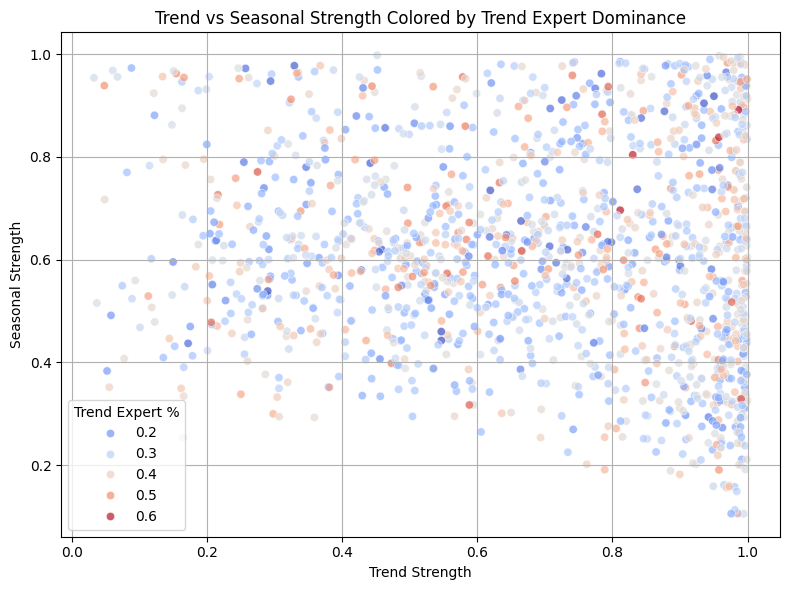

In [16]:
# plot in a graph the trend and seasonal_strength features, where x-axis is the trend and y-axis is the seasonal_strength
plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(
    data=df,
    x="trend",
    y="seasonal_strength",
    hue=1,
    palette="coolwarm",  # blue to red gradient
    edgecolor="w",
    alpha=0.7
)

plt.title("Trend vs Seasonal Strength Colored by Trend Expert Dominance")
plt.xlabel("Trend Strength")
plt.ylabel("Seasonal Strength")
plt.legend(title="Trend Expert %")
plt.grid(True)
plt.tight_layout()
plt.show()


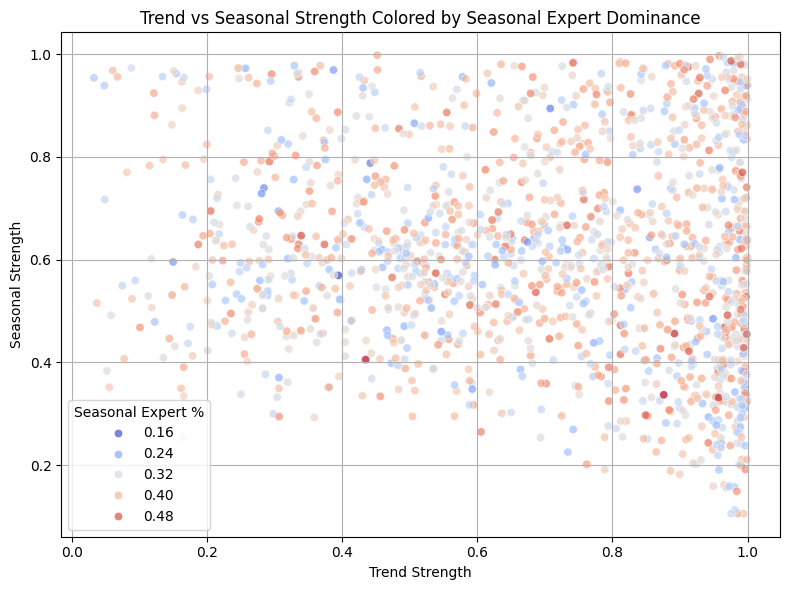

In [17]:
# plot in a graph the trend and seasonal_strength features, where x-axis is the trend and y-axis is the seasonal_strength
plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(
    data=df,
    x="trend",
    y="seasonal_strength",
    hue=2,
    palette="coolwarm",  # blue to red gradient
    edgecolor="w",
    alpha=0.7
)

plt.title("Trend vs Seasonal Strength Colored by Seasonal Expert Dominance")
plt.xlabel("Trend Strength")
plt.ylabel("Seasonal Strength")
plt.legend(title="Seasonal Expert %")
plt.grid(True)
plt.tight_layout()
plt.show()


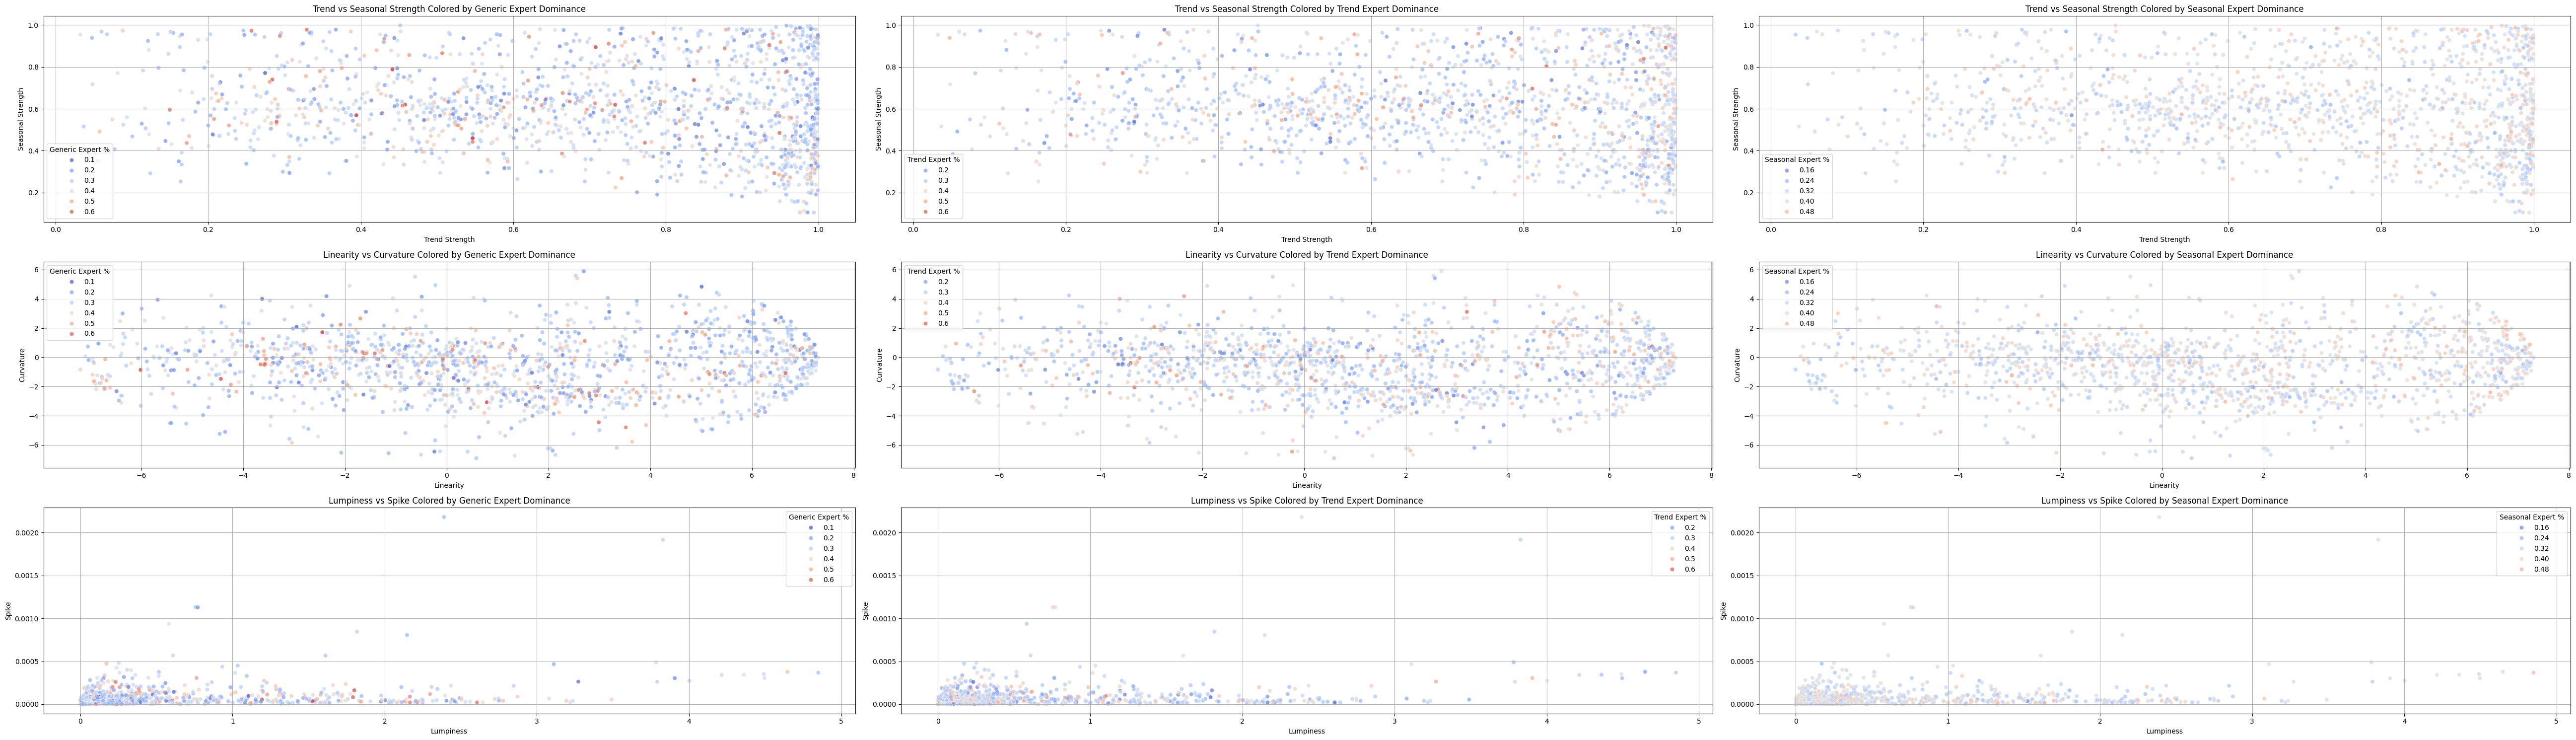

In [18]:
# Example dominance columns (assuming these exist in your df)
dominance_cols = [0, 1, 2]

# Calculate the global min and max across all three dominance columns
vmin = df[dominance_cols].min().min()
vmax = df[dominance_cols].max().max()
map_index = {0: "Generic Expert", 1: "Trend Expert", 2: "Seasonal Expert"}

plt.figure(figsize=(52, 15))

for i, col in enumerate(dominance_cols):
    plt.subplot(3, 3, i+1)
    scatter = sns.scatterplot(
        data=df,
        x="trend",
        y="seasonal_strength",
        hue=df[col],            # use the actual column for hue
        palette="coolwarm",
        edgecolor="w",
        alpha=0.7,
        hue_norm=(vmin, vmax)    # normalize the hue scale to the global min/max
    )
    plt.title(f"Trend vs Seasonal Strength Colored by {map_index[i]} Dominance")
    plt.xlabel("Trend Strength")
    plt.ylabel("Seasonal Strength")
    plt.legend(title=f"{map_index[i]} %")
    plt.grid(True)

    plt.subplot(3, 3, i+4)

    scatter = sns.scatterplot(
        data=df,
        x="linearity",
        y="curvature",
        hue=df[col],            # use the actual column for hue
        palette="coolwarm",
        edgecolor="w",
        alpha=0.7,
        hue_norm=(vmin, vmax)    # normalize the hue scale to the global min/max
    )
    plt.title(f"Linearity vs Curvature Colored by {map_index[i]} Dominance")
    plt.xlabel("Linearity")
    plt.ylabel("Curvature")
    plt.legend(title=f"{map_index[i]} %")
    plt.grid(True)

    plt.subplot(3, 3, i+7)

    scatter = sns.scatterplot(
        data=df,
        x="lumpiness",
        y="spike",
        hue=df[col],            # use the actual column for hue
        palette="coolwarm",
        edgecolor="w",
        alpha=0.7,
        hue_norm=(vmin, vmax)    # normalize the hue scale to the global min/max
    )
    plt.title(f"Lumpiness vs Spike Colored by {map_index[i]} Dominance")
    plt.xlabel("Lumpiness")
    plt.ylabel("Spike")
    plt.legend(title=f"{map_index[i]} %")
    plt.grid(True)


plt.tight_layout()
plt.show()


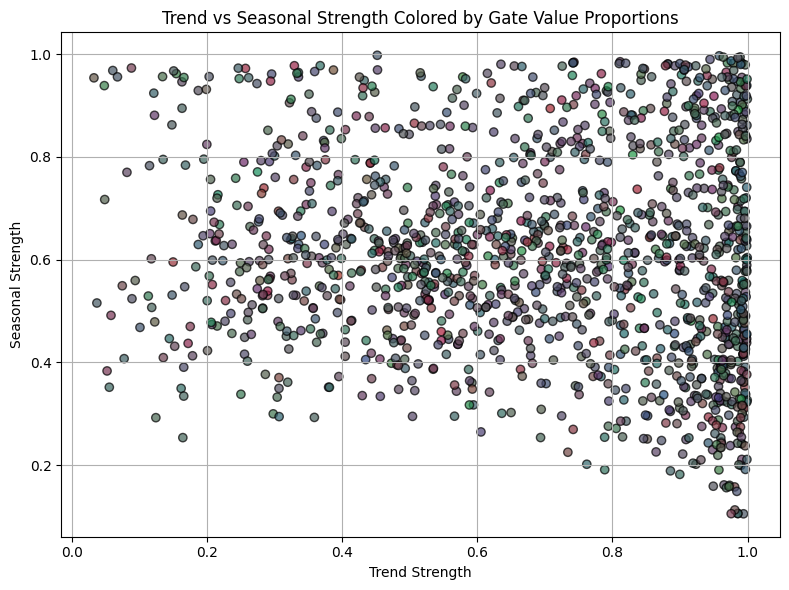

In [19]:
# Step 1: Calculate proportions for gate values
total = df[0] + df[1] + df[2]
df['gate0_pct'] = df[0] / total
df['gate1_pct'] = df[1] / total
df['gate2_pct'] = df[2] / total

# Step 2: Create RGB color array (R=gate0, G=gate1, B=gate2)
colors = df[['gate0_pct', 'gate1_pct', 'gate2_pct']].values

# Step 3: Plot
plt.figure(figsize=(8, 6))
plt.scatter(
    df['trend'],
    df['seasonal_strength'],
    c=colors,
    edgecolor='k',
    alpha=0.7
)
plt.title("Trend vs Seasonal Strength Colored by Gate Value Proportions")
plt.xlabel("Trend Strength")
plt.ylabel("Seasonal Strength")
plt.grid(True)
plt.tight_layout()
plt.show()